# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I will never fly British Ai...
1,✅ Trip Verified | Worst aircraft I have ever ...
2,✅ Trip Verified | I enjoyed my flight. The bo...
3,✅ Trip Verified | Why do you make it so hard? ...
4,✅ Trip Verified | After several delays and ca...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Data preprocessing

In [5]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')
df

C:\Users\91878\AppData\Local\Temp\ipykernel_38276\1384873472.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')


,reviews
0,| I will never fly British Airways again. To ...
1,| Worst aircraft I have ever flown. The seats...
2,| I enjoyed my flight. The boarding was swift...
3,| Why do you make it so hard? After a so so lo...
4,"| After several delays and canceled flights, ..."
...,...
1995,I flew from Frankfurt to London Heathrow on BA...
1996,Flew from Leeds Bradford to London Heathrow. S...
1997,Bengaluru to London Heathrow with British Airw...
1998,✅ Verified Review | Flew Bangkok to London. I...


In [6]:
df['reviews'] = df['reviews'].str.replace('✅ Verified Review |', '')
df

C:\Users\91878\AppData\Local\Temp\ipykernel_38276\1799885853.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('✅ Verified Review |', '')


,reviews
0,| I will never fly British Airways again. To ...
1,| Worst aircraft I have ever flown. The seats...
2,| I enjoyed my flight. The boarding was swift...
3,| Why do you make it so hard? After a so so lo...
4,"| After several delays and canceled flights, ..."
...,...
1995,I flew from Frankfurt to London Heathrow on BA...
1996,Flew from Leeds Bradford to London Heathrow. S...
1997,Bengaluru to London Heathrow with British Airw...
1998,| Flew Bangkok to London. It's been a few yea...


In [7]:
df['reviews'] = df['reviews'].str.replace('|', '')
df

C:\Users\91878\AppData\Local\Temp\ipykernel_38276\4279312925.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace('|', '')


,reviews
0,I will never fly British Airways again. To s...
1,Worst aircraft I have ever flown. The seats ...
2,I enjoyed my flight. The boarding was swift ...
3,Why do you make it so hard? After a so so lou...
4,"After several delays and canceled flights, w..."
...,...
1995,I flew from Frankfurt to London Heathrow on BA...
1996,Flew from Leeds Bradford to London Heathrow. S...
1997,Bengaluru to London Heathrow with British Airw...
1998,Flew Bangkok to London. It's been a few year...


In [8]:
df.iloc[0][0]

'  I will never fly British Airways again. To start, the plane was over 2 hours late, with no weather and no reason given. The boarding process was chaotic, both in the airport and onto the plane. But more importantly, although we were in business class, it wasn’t really business class. There were a few aisles —not separated in any way—in which they simply put a tray on the middle seat so that no one sits there. And those seats, like the rest, were extremely cramped and uncomfortable. I could not believe they called this business class.'

In [9]:
df['reviews'] = df['reviews'].str.lstrip()
df

,reviews
0,I will never fly British Airways again. To sta...
1,Worst aircraft I have ever flown. The seats we...
2,I enjoyed my flight. The boarding was swift an...
3,Why do you make it so hard? After a so so loun...
4,"After several delays and canceled flights, we ..."
...,...
1995,I flew from Frankfurt to London Heathrow on BA...
1996,Flew from Leeds Bradford to London Heathrow. S...
1997,Bengaluru to London Heathrow with British Airw...
1998,Flew Bangkok to London. It's been a few years ...


In [10]:
df.iloc[0][0]

'I will never fly British Airways again. To start, the plane was over 2 hours late, with no weather and no reason given. The boarding process was chaotic, both in the airport and onto the plane. But more importantly, although we were in business class, it wasn’t really business class. There were a few aisles —not separated in any way—in which they simply put a tray on the middle seat so that no one sits there. And those seats, like the rest, were extremely cramped and uncomfortable. I could not believe they called this business class.'

### Analysing sentiment using pretrained BERT model

In [11]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117


In [12]:
!pip install transformers

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch, numpy as np

In [14]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [15]:
def score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [16]:
df['sentiment_score'] = df['reviews'].apply(lambda x: score(x[:512]))
df

,reviews,sentiment_score
0,I will never fly British Airways again. To sta...,2
1,Worst aircraft I have ever flown. The seats we...,1
2,I enjoyed my flight. The boarding was swift an...,4
3,Why do you make it so hard? After a so so loun...,2
4,"After several delays and canceled flights, we ...",1
...,...,...
1995,I flew from Frankfurt to London Heathrow on BA...,2
1996,Flew from Leeds Bradford to London Heathrow. S...,5
1997,Bengaluru to London Heathrow with British Airw...,2
1998,Flew Bangkok to London. It's been a few years ...,3


In [17]:
def sentiment_calc(score):
    if score>=4:
        s = "Positive"
    elif score<=2:
        s = "Negative"
    else:
        s = "Neutral"
    return s

In [18]:
df['sentiment'] = df['sentiment_score'].apply(lambda x: sentiment_calc(x))
df

,reviews,sentiment_score,sentiment
0,I will never fly British Airways again. To sta...,2,Negative
1,Worst aircraft I have ever flown. The seats we...,1,Negative
2,I enjoyed my flight. The boarding was swift an...,4,Positive
3,Why do you make it so hard? After a so so loun...,2,Negative
4,"After several delays and canceled flights, we ...",1,Negative
...,...,...,...
1995,I flew from Frankfurt to London Heathrow on BA...,2,Negative
1996,Flew from Leeds Bradford to London Heathrow. S...,5,Positive
1997,Bengaluru to London Heathrow with British Airw...,2,Negative
1998,Flew Bangkok to London. It's been a few years ...,3,Neutral


In [19]:
df['sentiment'].value_counts()

Negative    1309
Positive     478
Neutral      213
Name: sentiment, dtype: int64

In [21]:
nd = df[df.sentiment == 'Negative']
nd

,reviews,sentiment_score,sentiment
0,I will never fly British Airways again. To sta...,2,Negative
1,Worst aircraft I have ever flown. The seats we...,1,Negative
3,Why do you make it so hard? After a so so loun...,2,Negative
4,"After several delays and canceled flights, we ...",1,Negative
5,Not Verified Literally the worst flight of m...,1,Negative
...,...,...,...
1984,Mexico to Amsterdam via London with British Ai...,1,Negative
1985,I was flying Zurich to Baltimore via London wi...,1,Negative
1995,I flew from Frankfurt to London Heathrow on BA...,2,Negative
1997,Bengaluru to London Heathrow with British Airw...,2,Negative


In [40]:
nds = nd[nd['reviews'].str.find('seat') >= 0]

In [43]:
nds

,reviews,sentiment_score,sentiment
0,I will never fly British Airways again. To sta...,2,Negative
1,Worst aircraft I have ever flown. The seats we...,1,Negative
8,Lost 3 out of 4 checked bags. Denied wheelchai...,1,Negative
9,I have flown with BA for many years and there ...,2,Negative
14,Not Verified BA changed our prepaid seats at...,1,Negative
...,...,...,...
1984,Mexico to Amsterdam via London with British Ai...,1,Negative
1985,I was flying Zurich to Baltimore via London wi...,1,Negative
1995,I flew from Frankfurt to London Heathrow on BA...,2,Negative
1997,Bengaluru to London Heathrow with British Airw...,2,Negative


In [44]:
nds.shape

(629, 3)

In [54]:
nds.reviews[1999]

'On our recent British Airways flight from Mauritius to London, we decided to pay for an upgrade. Only to find when we got on the plane that the seats given to us were not functional. We had no entertainment on the 12 hour flight, no power to the seat so could not even read. British Airways are not willing to offer us a refund on the upgrade, as they advise their responsibility is to get us from A to B. The entertainment system are all additional and not part of the ticket price. Even though looking at their website they state "personal entertainment system with noise-reducing headphones" as one of the selling points for upgrading or flying premier economy. The fact that we did not even get to watch the security video is not a concern to BA. As someone who flies BA a lot, they have just lost a customer and do not care. I would avoid flying BA now. Terrible service.'

In [50]:
ndstaff = nd[(nd['reviews'].str.find('staff') >= 0) | (nd['reviews'].str.find('crew') >= 0)]
ndstaff

,reviews,sentiment_score,sentiment
1,Worst aircraft I have ever flown. The seats we...,1,Negative
3,Why do you make it so hard? After a so so loun...,2,Negative
7,Obviously many airlines have gone downhill in ...,2,Negative
8,Lost 3 out of 4 checked bags. Denied wheelchai...,1,Negative
9,I have flown with BA for many years and there ...,2,Negative
...,...,...,...
1966,The British Airways experience has really decl...,2,Negative
1970,We booked the return from our honeymoon with B...,2,Negative
1972,Abuja to London Heathrow. This flight took off...,1,Negative
1975,I was booked to travel British Airways from He...,2,Negative


In [53]:
ndstaff.shape

(632, 3)

In [55]:
ndf = nd[(nd['reviews'].str.find('food') >= 0) | (nd['reviews'].str.find('catering') >= 0)]
ndf

,reviews,sentiment_score,sentiment
1,Worst aircraft I have ever flown. The seats we...,1,Negative
3,Why do you make it so hard? After a so so loun...,2,Negative
9,I have flown with BA for many years and there ...,2,Negative
40,"Not Verified Flew premium, only worth the ex...",1,Negative
41,First our morning flight was cancelled and mov...,2,Negative
...,...,...,...
1963,Berlin TXL to London Heathrow with British Air...,1,Negative
1964,Warsaw to London Heathrow. I fly the route reg...,2,Negative
1968,Philadelphia to London Heathrow with British A...,1,Negative
1973,London Heathrow to Istanbul return. The outbou...,1,Negative


In [60]:
ndf.shape

(452, 3)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

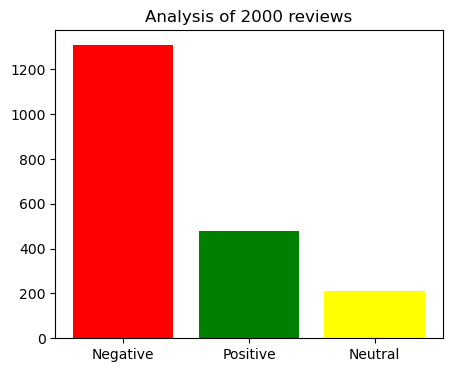

In [10]:
plt.figure(figsize = (5,4))
plt.bar(['Negative', 'Positive', 'Neutral'], [1309, 478, 213], color = ['red', 'green', 'yellow'])
plt.title('Analysis of 2000 reviews')
plt.savefig('reviews.png')

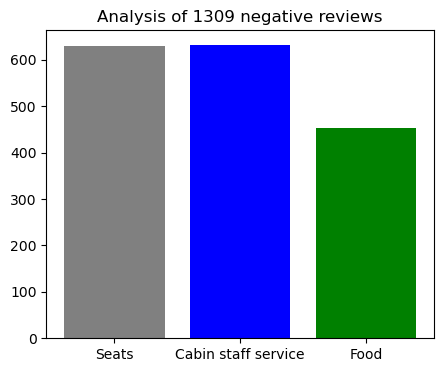

In [11]:
plt.figure(figsize = (5,4))
plt.bar(['Seats', 'Cabin staff service', 'Food'], [629, 632, 452], color = ['grey', 'blue', 'green'])
plt.title('Analysis of 1309 negative reviews')
plt.savefig('neg.png')